=== Basic Statistics ===
       Height_cm  Weight_kg  Age_years  Temperature_C  Wind_speed_ms  \
count     300.00     300.00     300.00         300.00         300.00   
mean      169.41      84.60      44.15          20.73           2.76   
std         9.87       6.75      15.02           4.77           4.31   
min       137.00      66.14      18.00           7.88          -8.69   
25%       163.00      79.73      31.00          17.24           0.18   
50%       170.00      84.54      44.00          20.86           2.46   
75%       176.00      89.01      57.00          23.54           5.89   
max       208.00     104.10      69.00          33.16          17.34   

       Humidity_percent  
count            300.00  
mean              59.91  
std               16.98  
min               30.00  
25%               46.00  
50%               60.00  
75%               74.00  
max               89.00  

=== Correlation Matrix ===
                  Height_cm  Weight_kg  Age_years  Temperature_C

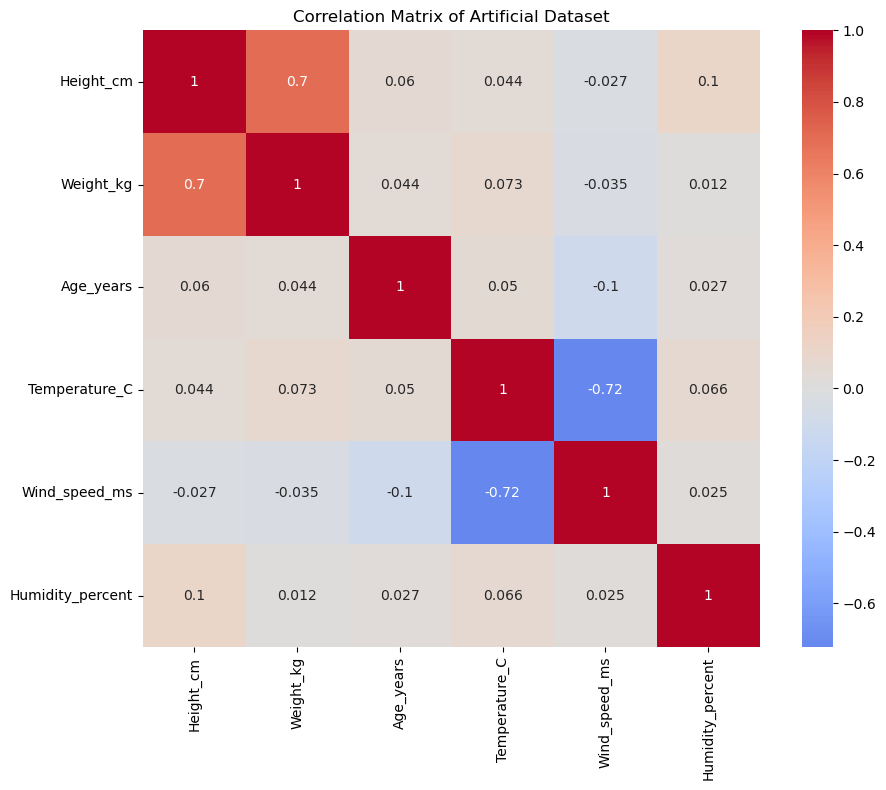

=== Requirement Check ===
1. All columns have different means: True
2. All columns have different stds: True
3. At least one integer column: True (['Height_cm', 'Age_years', 'Humidity_percent'])
4. At least one float column: True (['Weight_kg', 'Temperature_C', 'Wind_speed_ms'])
5. Positive correlations > 0.2 exist: True (e.g., 0.703)
6. Negative correlations < -0.4 exist: True (e.g., -0.722)
7. Near-zero correlations exist: True (e.g., 0.060)
Dataset saved as 'artificial_dataset.csv'
First 5 rows of the dataset:
   Height_cm  Weight_kg  Age_years  Temperature_C  Wind_speed_ms  \
0        174  82.855025         64      22.588295       0.929141   
1        168  81.199095         21      16.371281       7.828211   
2        176  91.736468         29      20.933834       4.396668   
3        185  95.551851         62      16.223085       0.536972   
4        167  83.395492         19      16.942411       9.264174   

   Humidity_percent  
0                81  
1                58  
2     

In [1]:
# %% [markdown]
# # 1.1.1 - Artificial Dataset Generation
# 
# **Objective**: Create a CSV with 300 rows and 6+ columns representing physical quantities with units.
# Requirements:
# - Different mean for each column
# - Different standard deviation for each column
# - At least one integer column
# - At least one float column
# - Positive correlation (>0.2) between some columns
# - Negative correlation (<-0.4) between some columns
# - Near-zero correlation between some columns

# %%
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Number of samples
n = 300

# %% [markdown]
# ## Generate Data with Physical Meaning
# 
# We create 6 columns with meaningful physical relationships:
# 1. **Height (cm)** - integers, normal distribution
# 2. **Weight (kg)** - floats, positively correlated with height
# 3. **Age (years)** - integers, uniform distribution
# 4. **Temperature (°C)** - floats, normal distribution
# 5. **Wind speed (m/s)** - floats, negatively correlated with temperature
# 6. **Humidity (%)** - integers, uniform distribution

# %%
# 1. Height in cm (integers, mean=170, std=10)
height = np.random.normal(170, 10, n).astype(int)

# 2. Weight in kg (floats, positively correlated with height: weight ≈ 0.5*height + noise)
weight = 0.5 * height + np.random.normal(0, 5, n)

# 3. Age in years (integers, uniform 18-70)
age = np.random.randint(18, 70, n)

# 4. Temperature in °C (floats, mean=20, std=5)
temperature = np.random.normal(20, 5, n)

# 5. Wind speed in m/s (floats, negatively correlated with temperature)
wind_speed = -0.6 * temperature + np.random.normal(15, 3, n)

# 6. Humidity in % (integers, uniform 30-90)
humidity = np.random.randint(30, 90, n)

# Create DataFrame
df = pd.DataFrame({
    'Height_cm': height,
    'Weight_kg': weight,
    'Age_years': age,
    'Temperature_C': temperature,
    'Wind_speed_ms': wind_speed,
    'Humidity_percent': humidity
})

# %% [markdown]
# ## Statistical Analysis

# %%
print("=== Basic Statistics ===")
print(df.describe().round(2))

print("\n=== Correlation Matrix ===")
corr_matrix = df.corr()
print(corr_matrix.round(3))

# %% [markdown]
# ## Visualize Correlations

# %%
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, square=True)
plt.title('Correlation Matrix of Artificial Dataset')
plt.tight_layout()
plt.show()

# %% [markdown]
# ## Verify Requirements

# %%
print("=== Requirement Check ===")

# 1. Different means
means = df.mean()
print(f"1. All columns have different means: {len(set(means.round(2))) == len(df.columns)}")

# 2. Different standard deviations
stds = df.std()
print(f"2. All columns have different stds: {len(set(stds.round(2))) == len(df.columns)}")

# 3. Integer columns
int_cols = [col for col in df.columns if df[col].dtype in [np.int32, np.int64]]
print(f"3. At least one integer column: {len(int_cols) >= 1} ({int_cols})")

# 4. Float columns
float_cols = [col for col in df.columns if df[col].dtype in [np.float32, np.float64]]
print(f"4. At least one float column: {len(float_cols) >= 1} ({float_cols})")

# 5. Positive correlation (>0.2)
corr_values = corr_matrix.values[np.triu_indices_from(corr_matrix, k=1)]
positive_corr = corr_values[corr_values > 0.2]
print(f"5. Positive correlations > 0.2 exist: {len(positive_corr) >= 1} (e.g., {positive_corr[0]:.3f})")

# 6. Negative correlation (<-0.4)
negative_corr = corr_values[corr_values < -0.4]
print(f"6. Negative correlations < -0.4 exist: {len(negative_corr) >= 1} (e.g., {negative_corr[0]:.3f})")

# 7. Near-zero correlation (between -0.1 and 0.1)
near_zero = corr_values[(corr_values > -0.1) & (corr_values < 0.1)]
print(f"7. Near-zero correlations exist: {len(near_zero) >= 1} (e.g., {near_zero[0]:.3f})")

# %% [markdown]
# ## Save to CSV

# %%
df.to_csv('artificial_dataset.csv', index=False)
print("Dataset saved as 'artificial_dataset.csv'")

# %% [markdown]
# ## Sample of Generated Data

# %%
print("First 5 rows of the dataset:")
print(df.head())